# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [75]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal

from __future__ import division


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


Pretty printing has been turned OFF


## Filtering 
**1.1**

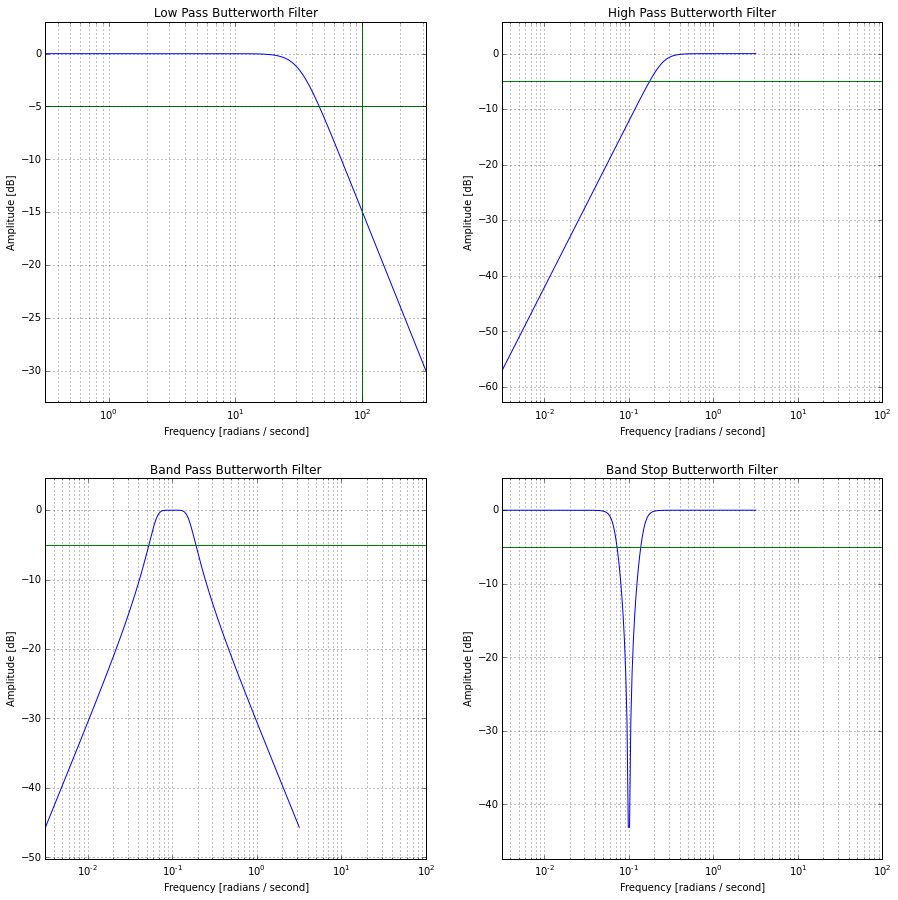

In [76]:
# For Butterworth, Chebychev-I  filters plot the magnitude resonse of Low-Pass, High-Pass, Band- Pass and Band-Stop 
# of the 3th order  filters

##-----BUTERWORTH FILTER------------##
# Butterworh low pass 3rd order
b1, a1 = signal.butter(3, 100, 'low', analog=True)
w1, h1 = signal.freqs(b1, a1)

# Butterworh high pass 3rd order
b2, a2 = signal.butter(3, 0.8, 'high', analog=True)
w2, h2 = signal.freqs(b2, a2)

# Butterworh band pass 3rd order
fs = 5000.0
lowcut = 500.0
highcut = 1250.0
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

b3, a3 = signal.butter( 3, [low, high], 'bandpass' , analog=True)
w3, h3 = signal.freqs(b3, a3)


#butterworth band stop 3rd order
b4, a4 = signal.butter( 3, [low, high], 'bandstop' , analog=True)
w4, h4 = signal.freqs(b4, a4)




plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.plot( w1 / np.pi, 10 * np.log10(np.abs( h1)))
plt.xscale('log')
plt.title('Low Pass Butterworth Filter')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp



plt.ylabel('Amplitude [dB]'), plt.xlabel('Frequency [radians / second]')

plt.subplot(2,2,2)
plt.plot( w2 / np.pi, 10 * np.log10(np.abs( h2 )))
plt.xscale('log')
plt.title('High Pass Butterworth Filter')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp



plt.subplot(2,2,3)
plt.plot( w3 / np.pi, 10 * np.log10(np.abs( h3 )))
plt.xscale('log')
plt.title('Band Pass Butterworth Filter')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp


plt.subplot(2,2,4)
plt.plot( w4 / np.pi, 10 * np.log10(np.abs( h4 )))
plt.xscale('log')
plt.title('Band Stop Butterworth Filter')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp







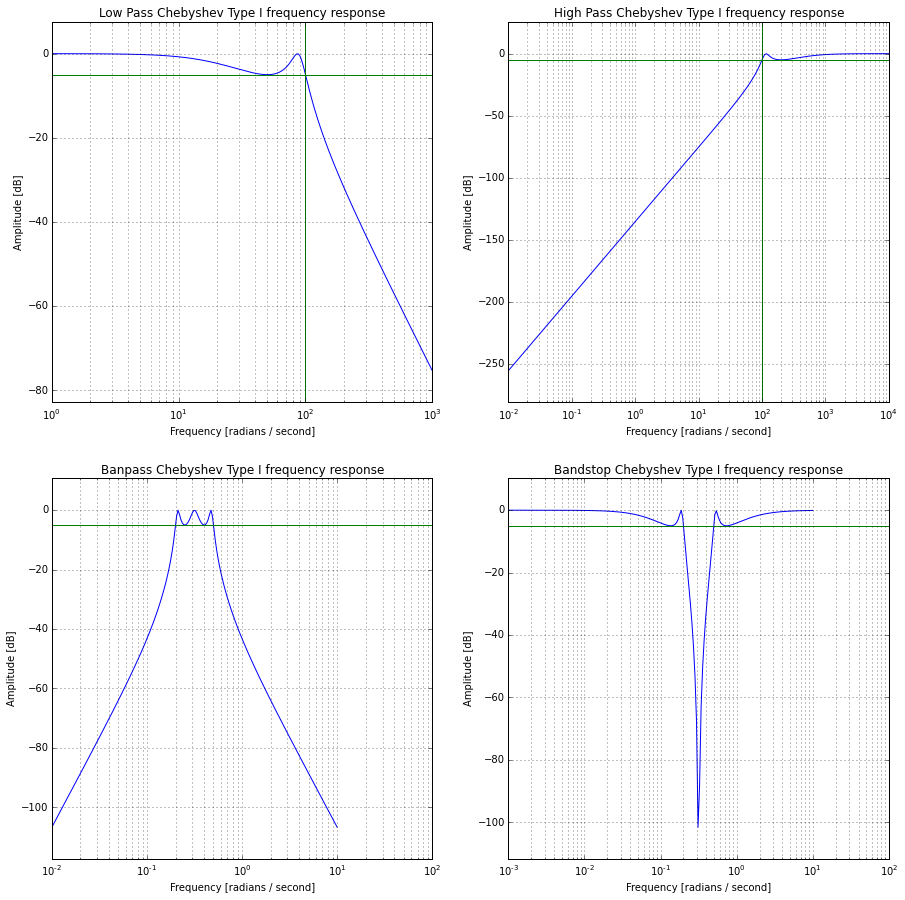

In [77]:
##-----CHEBYSHEV FILTER------------##
# chebyshev low pass 3rd order
b1, a1 = signal.cheby1(3, 5, 100, 'low', analog=True)
w1, h1 = signal.freqs(b1, a1)

# chebyshev high pass 3rd order
b2, a2 = signal.cheby1(3, 5, 100, 'high', analog=True)
w2, h2 = signal.freqs(b2, a2)

# chebyshev band pass 3rd order
b3, a3 = signal.cheby1(3, 5,  [low, high], 'bandpass', analog=True)
w3, h3 = signal.freqs(b3, a3)


# chebyshev band stop 3rd order
b4, a4 = signal.cheby1(3, 5,  [low, high], 'bandstop', analog=True)
w4, h4 = signal.freqs(b4, a4)



plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.plot(w1, 20 * np.log10(abs(h1)))
plt.xscale('log')
plt.title('Low Pass Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp



plt.subplot(2,2,2)
plt.plot(w2, 20 * np.log10(abs(h2)))
plt.xscale('log')
plt.title('High Pass Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp



plt.subplot(2,2,3)
plt.plot(w3, 20 * np.log10(abs(h3)))
plt.xscale('log')
plt.title('Banpass Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp


plt.subplot(2,2,4)
plt.plot(w4, 20 * np.log10(abs(h4)))
plt.xscale('log')
plt.title('Bandstop Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp






**1.2**

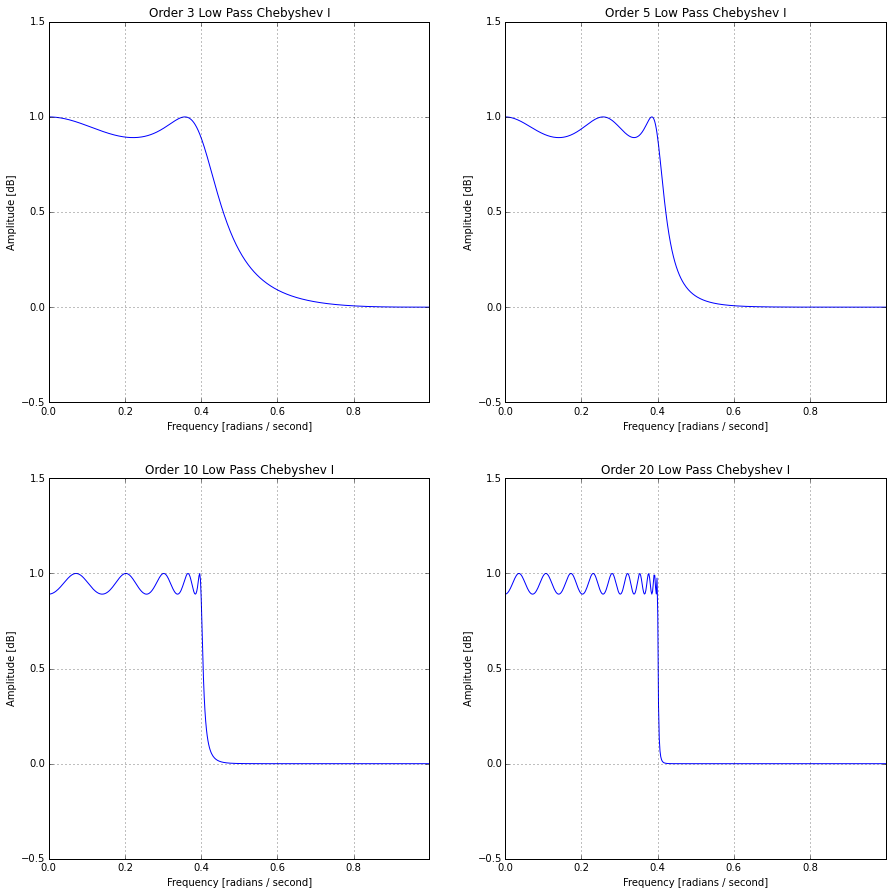

In [78]:
#  Plot  the  low-pass  response  of  the  Chebychev-I   filter  while  increasing  the  order  of  the   filter
# [3;5;10;20] (ripple = 1.0).  Discuss your observations.

b3, a3 = signal.cheby1( 3, 1.0, 0.4, 'low')
w3, h3 = signal.freqz(b3, a3)

b5, a5 = signal.cheby1( 5, 1.0, 0.4, 'low')
w5, h5 = signal.freqz(b5, a5)

b10, a10 = signal.cheby1( 10, 1.0, 0.4, 'low')
w10, h10 = signal.freqz(b10, a10)

b20, a20 = signal.cheby1( 20, 1.0, 0.4, 'low')
w20, h20 = signal.freqz(b20, a20)



plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.plot(w3/np.pi, abs(h3))
plt.title('Order 3 Low Pass Chebyshev I ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.5)
plt.grid(which='both', axis='both')


plt.subplot(2,2,2)
plt.plot(w5/np.pi, abs(h5))
plt.title('Order 5 Low Pass Chebyshev I ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.5)
plt.grid(which='both', axis='both')




plt.subplot(2,2,3)
plt.plot(w10/np.pi, abs(h10))
plt.title('Order 10 Low Pass Chebyshev I ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.5)
plt.grid(which='both', axis='both')



plt.subplot(2,2,4)
plt.plot(w20/np.pi, abs(h20))
plt.title('Order 20 Low Pass Chebyshev I')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.5)
plt.grid(which='both', axis='both')



#----To show all graphs in one usind labels and colors:
#plt.plot(w3/np.pi, abs(h3), label="order 3")
#plt.plot(w5/np.pi, abs(h5), label="order 5")
#plt.plot(w10/np.pi, abs(h10), label="order 10")
#plt.plot(w20/np.pi, abs(h20), label="order 20")
#plt.title('Low Pass Chebyshev Type I frequency response')
#plt.xlabel('Frequency [radians / second]')
#plt.ylabel('Amplitude [dB]')
#plt.legend()
#plt.show()



## Recursive filter 

**2.1**

<Container object of 3 artists>

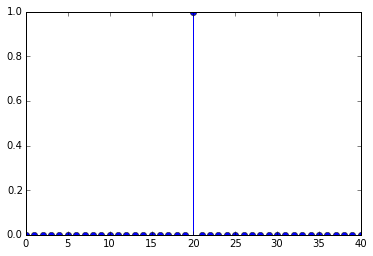

In [79]:
# Construct a signal: x[k]k2[1;40]=dirac(k-20)

def dirac(n=0, N=10):
    if n < 0 or n > N-1:
        raise NameError('n should be in range [0, N-1]')
        return
    
    dirac_seq = np.zeros((N,))
    dirac_seq[n] = 1 
    
    return dirac_seq


dirac_signal = dirac(20, 41)
plt.stem (dirac_signal)


**2.2**

<Container object of 3 artists>

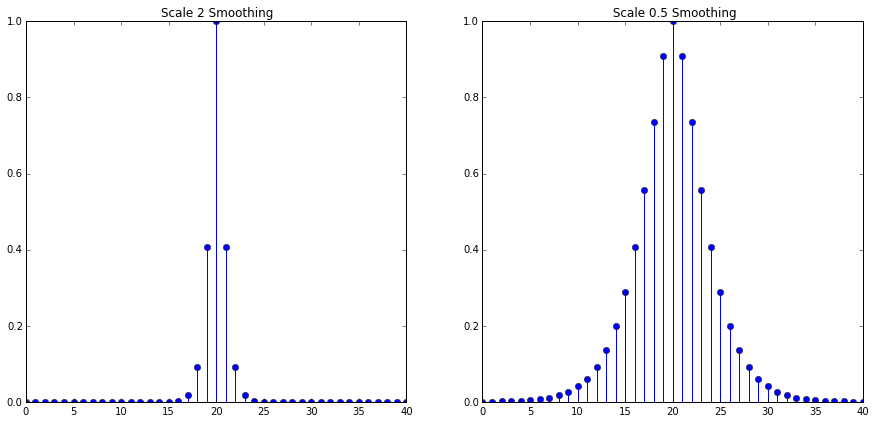

In [101]:
## Apply the causal and the anti-causal parts of the smoothing lter on the signal.

def SmoothingFilter( s, scaling, Ts):
    
    scale = scaling / Ts   # normalize by scaling to ts
    s = np.pad( s, [2, 2], 'constant')   # zero padding: 2 in front, 2 in back
    alpha = scale * Ts
    a = np.exp (-alpha)

    causal = np.zeros ( s.shape )  #causal part of smoothing filter
    for i in range(2, s.size):
        causal[i] = s[i] + a * (alpha - 1) * s[i-1] +  2 * a * causal[i-1] - a * a * causal[i-2]
    
    anticausal = np.zeros(s.shape)  #anticausal part of smoothing filter
    for k in range( s.size-3, -1, -1):
        anticausal[k] = a * (alpha + 1) * s[k+1] - a * a * s[k+2] + 2 * a * anticausal[k+1] - a * a * anticausal[k+2]
    
    x = causal + anticausal
    return x[2:-2]  # return signal without padding, thus we remove zeros: 2 in front, 2 in back


smooth2 = SmoothingFilter(dirac_signal, scaling = 2, Ts=1/41)
smooth05 = SmoothingFilter (dirac_signal, scaling = 0.5, Ts=1/41)


plt.figure( figsize=(15,15) )
plt.subplot(2,2,1)
plt.title('Scale 2 Smoothing ')
plt.stem( smooth2 )

plt.subplot(2,2,2)
plt.title(' Scale 0.5 Smoothing ')
plt.stem( smooth05 )

**2.3**

<Container object of 3 artists>

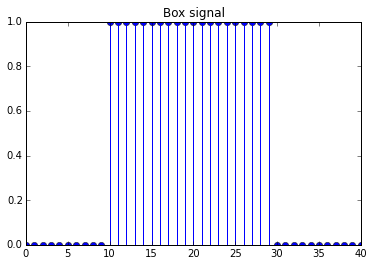

In [84]:
##  Construct a signal: x[k] = u[k-10] - u[k-30]  where k[1,40]

def step(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')       
    s = np.zeros((N, ))
    for idx_s in np.arange(n, N):
        s[idx_s] = 1  
    return s

box_signal = step(10, 41) - step(30, 41)

plt.title('Box signal')
plt.stem(box_signal)


**2.4**

<Container object of 3 artists>

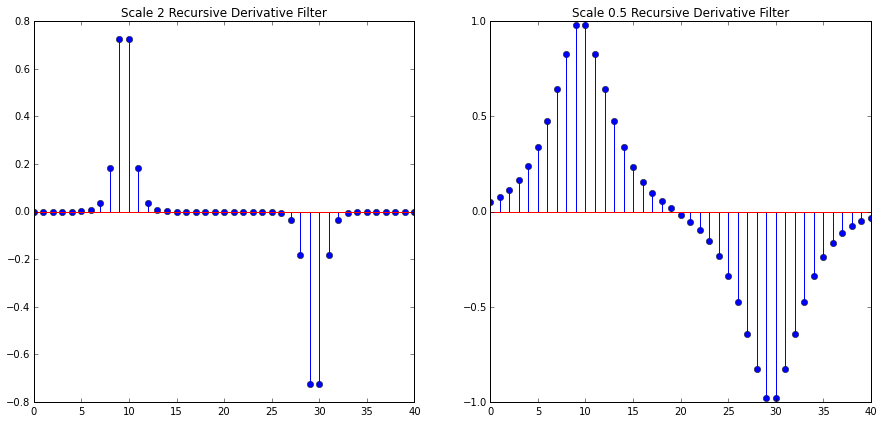

In [103]:
# Apply  the  causal  and  the  anti-causal  parts  of  the  smoothing   lter  on  the  signal. 

def DerivativeFilter( s, scaling=0.5, Ts=1):
  
    scaling = scaling / Ts     # normalize by scaling to ts
    
    s = np.pad( s, [2, 2], 'constant')  # zero padding: 2 in front, 2 in back
    
    alpha = scaling * Ts   
    a = np.exp(-alpha)

    causal = np.zeros( s.shape )
    for i in range(2, s.size):
        causal[i] = -scaling * a * alpha * s[i-1] + 2 * a * causal[i-1] - a * a * causal[i-2]
    
    anticausal = np.zeros(s.shape)
    for k in range(s.size-3, -1, -1):
        anticausal[k] = scaling * a * alpha * s[k+1] + 2 * a * anticausal[k+1] - a * a * anticausal[k+2]
    
    x = causal + anticausal
    return x[2:-2]  #remove padding: 2 in front, 2 in back


recursive2 = DerivativeFilter( box_signal, scaling = 2, Ts = 1)
recursive05 = DerivativeFilter( box_signal, scaling = 0.5, Ts = 1)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1) 
plt.title('Scale 2 Recursive Derivative Filter ')
plt.stem( recursive2 )

plt.subplot(2,2,2) 
plt.title('Scale 0.5 Recursive Derivative Filter')
plt.stem( recursive05 )

**3.1**

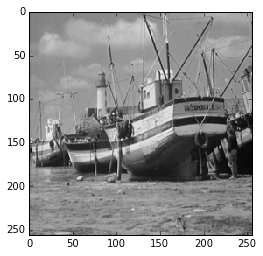

In [107]:
# Load a gray image and display this image

boat_img = img_as_float(io.imread ('../images/boat.256.gif', as_grey=True))
plt.figure()
io.imshow(boat_img)

**3.2** , **3.3**

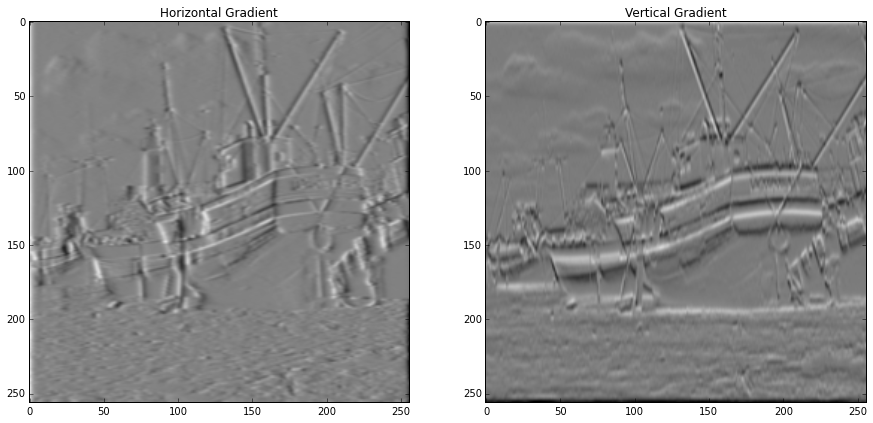

In [118]:
## Apply  the  smoothing  (derivative)   filter  along  the  columns  (rows)  of  the  images  
## to  obtain  the component of the gradient on the horizontal direction.

smooth_rows = np.zeros( boat_img.shape ) 
for row in range (boat_img.shape [0]):  # applyting smooth filter in rows
    smooth_rows[row, : ] = SmoothingFilter ( boat_img[row, : ], scaling = 1.5,  Ts=1 ) 
    
hor_gradient = np.zeros (boat_img.shape) #obtaining the gradient in the horizontal direction by applyting derivative
for row in range (boat_img.shape [0]):
    hor_gradient[row, : ] = DerivativeFilter ( smooth_rows[row, :], scaling = 1.5,  Ts=1 )
 

## Apply  the  smoothing  (derivative)   filter  along  the  rows  (columns)  of  the  images  
## to  obtain  the component of the gradient on the vertical direction

smooth_cols = np.zeros( boat_img.shape ) 
for col in range (boat_img.shape [1]):   #applying smooth filter in columns
    smooth_cols[: , col ] = SmoothingFilter(boat_img[ :, col ], scaling=1.5,  Ts=1 )

vert_gradient = np.zeros (boat_img.shape)
for col in range (boat_img.shape [1]):   #obtaining the vertical gradient by applying  derivative filter
    vert_gradient[: , col ] = DerivativeFilter (smooth_cols[:, col ], scaling = 1.5,  Ts=1)
    
    
plt.figure( figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(hor_gradient, cmap='gray')
plt.title('Horizontal Gradient') 

plt.subplot(1,2,2)
plt.imshow(vert_gradient, cmap='gray')
plt.title('Vertical Gradient')


**3.4**

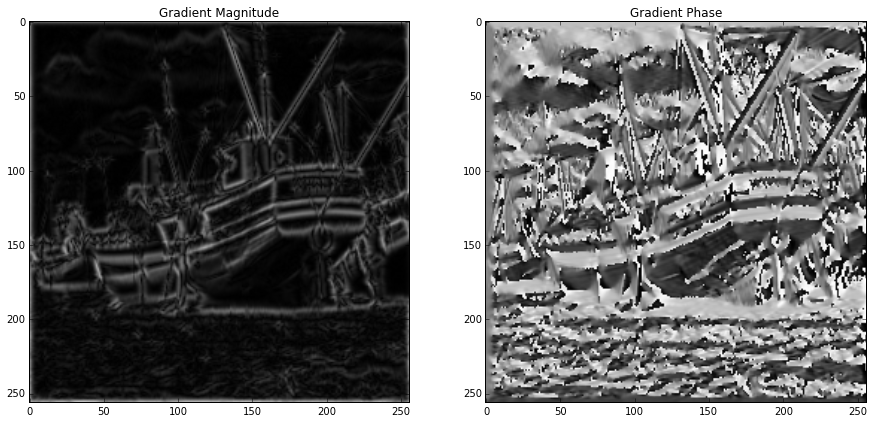

In [119]:
# Write Canny edge detection function.
# Display gradient magnitude and phase.

gradient_magnitude = np.sqrt (np.square (hor_gradient) + np.square(vert_gradient))
gradient_phase = np.arctan2 ( vert_gradient, hor_gradient )

plt.figure(figsize= (15, 15))
plt.subplot(1, 2, 1)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.subplot(1, 2, 2)
plt.imshow(gradient_phase, cmap='gray')
plt.title('Gradient Phase')
